<a href="https://colab.research.google.com/github/Piyush-Sharma135/python_basics/blob/main/Data_Prep_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
groceries = pd.read_excel('/content/Groceries.xlsx')
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


In [2]:
groceries["Last_Updated_Time"] = groceries.Last_Updated.dt.time

In [3]:
groceries["Shipment_Date_DOW"] = groceries.Next_Scheduled_Shipment.dt.dayofweek

In [4]:
dow_mapping = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

In [5]:
groceries["Shipment_Date_DOW"] = groceries["Shipment_Date_DOW"].map(dow_mapping)

In [6]:
groceries["New_Shipment_Date"] = groceries.Next_Scheduled_Shipment + pd.to_timedelta(1,'D')

In [7]:
groceries["New_Shipment_Date"] = np.where(groceries.Category =='Produce: Fruit',
         groceries.Next_Scheduled_Shipment + pd.to_timedelta(1,'D'),
         groceries.Next_Scheduled_Shipment
         )

groceries.head(10)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,15:35:00,Thursday,2023-06-16
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,18:30:00,Thursday,2023-06-16
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,17:22:00,Thursday,2023-06-16
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,16:29:00,Thursday,2023-06-16
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,18:10:00,Thursday,2023-06-16
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15,19:15:00,Thursday,2023-06-16
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15,19:25:00,Thursday,2023-06-15
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15,18:05:00,Thursday,2023-06-15
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15,16:42:00,Thursday,2023-06-15
9,P100019,Produce: Vegetable,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15,17:47:00,Thursday,2023-06-15


In [8]:
groceries["Product_ID"] = groceries.Product_ID.str[1:].astype('int')

In [9]:
groceries.dtypes

Product_ID                          int64
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
Last_Updated_Time                  object
Shipment_Date_DOW                  object
New_Shipment_Date          datetime64[ns]
dtype: object

In [10]:
groceries[["Category", "Sub_Category"]] = pd.DataFrame(groceries.Category.str.split(':').to_list())

In [11]:
groceries.Item.str.lower().str.contains('organic')

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Item, dtype: bool

In [12]:
groceries.loc[groceries["Inventory"] >=200, "Category"]

0     Produce
1     Produce
2     Produce
7     Produce
9     Produce
11    Produce
13    Produce
14    Produce
16    Produce
18     Pantry
19     Pantry
Name: Category, dtype: object

In [13]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Sub_Category
0,100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,15:35:00,Thursday,2023-06-16,Fruit
1,100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,18:30:00,Thursday,2023-06-16,Fruit
2,100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,17:22:00,Thursday,2023-06-16,Fruit
3,100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,16:29:00,Thursday,2023-06-16,Fruit
4,100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,18:10:00,Thursday,2023-06-16,Fruit


In [14]:
groceries[groceries.Sub_Category == 'Fruit']
# returns nothing as there are leading/trailing spaces in Sub_Category column

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Sub_Category


In [15]:
groceries.Sub_Category = groceries.Sub_Category.str.strip()
groceries.Sub_Category.head()

0    Fruit
1    Fruit
2    Fruit
3    Fruit
4    Fruit
Name: Sub_Category, dtype: object

In [16]:
groceries.sort_values(['Category', 'Price_Dollars'], ascending = [True, False]).head(5)

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date,Sub_Category
23,100033,Frozen,Frozen Blueberries,10.99,162,2023-05-28 22:14:00,2023-06-28,22:14:00,Wednesday,2023-06-28,Frozen Fruit
24,100034,Frozen,Frozen Pineapple,7.96,178,2023-05-28 22:11:00,2023-06-28,22:11:00,Wednesday,2023-06-28,Frozen Fruit
21,100031,Frozen,Chicken Nuggets,6.99,85,2023-05-28 22:02:00,2023-06-28,22:02:00,Wednesday,2023-06-28,Frozen Snacks
22,100032,Frozen,Spinach Dip,4.96,76,2023-05-28 22:05:00,2023-06-28,22:05:00,Wednesday,2023-06-28,Frozen Snacks
19,100029,Pantry,Cookies (Oatmeal),5.39,340,2023-06-10 12:24:00,2023-06-24,12:24:00,Saturday,2023-06-24,Snacks


In [17]:
(groceries
  .groupby(['Category', 'Sub_Category'])[["Inventory", "Price_Dollars"]]
  .agg(['max', 'min', 'count'])
  .reset_index()
  .head(5)
)

Category   Sub_Category Inventory            Price_Dollars            
                                max  min count           max   min count
0   Frozen   Frozen Fruit       178  162     2         10.99  7.96     2
1   Frozen  Frozen Snacks        85   76     2          6.99  4.96     2
2   Pantry         Snacks       365    5     4          5.39  1.50     4
3  Produce          Dairy       432   32     4          4.49  1.00     4
4  Produce          Fruit       500   50     6          5.99  0.40     6

In [18]:
# For every category, find the most expensive item
(groceries[['Category', 'Item', 'Price_Dollars']]
  .sort_values('Price_Dollars', ascending = False)
  .groupby('Category')
  .head(1))

#Sort Values has already given us highest value items of each category. We just need to do head(1) to get the top item

,Category,Item,Price_Dollars
23,Frozen,Frozen Blueberries,10.99
11,Produce,Chicken (Organic),10.49
19,Pantry,Cookies (Oatmeal),5.39


ASSIGNMENT 6


In [19]:
df = pd.read_csv('/content/happiness_survey_data.csv')
df.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Afghanistan,2008,3.723590,0.450662,0.718114,50.500000
1,Afghanistan,2009,4.401778,0.552308,0.678896,50.799999
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001


In [20]:
df.shape

(2089, 6)

In [21]:
df.describe()

,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
count,2089.000000,2089.000000,2076.000000,2057.000000,2031.000000
mean,2013.727621,5.473747,0.811542,0.745462,63.180326
std,4.455614,1.115567,0.118935,0.140751,6.948546
min,2005.000000,2.178809,0.290184,0.257534,6.720000
25%,2010.000000,4.651972,0.747664,0.651689,58.965000
50%,2014.000000,5.405246,0.834770,0.767357,64.980003
75%,2017.000000,6.294282,0.904682,0.857677,68.362499
max,2021.000000,8.018934,0.987343,0.985178,74.349998


In [22]:
#Filter data between 2010 and 2019
import numpy as np
mask = (df.year>=2010) & (df.year<=2019)
filtered_df = df[mask]

In [23]:
filtered_df.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001
5,Afghanistan,2013,3.572100,0.483552,0.577955,52.000000
6,Afghanistan,2014,3.130896,0.525568,0.508514,52.299999


In [24]:
#Group data by country and calculate max happiness score for each one
filtered_df.groupby("country_name")["happiness_score"].max().sort_values(ascending=False).head(5)

country_name
Finland        7.858107
Denmark        7.788232
Switzerland    7.776209
Norway         7.678277
Canada         7.650346
Name: happiness_score, dtype: float64

In [25]:
# Find mean happiness score
filtered_df.groupby("country_name")["happiness_score"].mean().sort_values(ascending=False).head(5)

country_name
Denmark        7.618252
Switzerland    7.568010
Finland        7.553138
Norway         7.541094
Iceland        7.518146
Name: happiness_score, dtype: float64

In [26]:
filtered_df[filtered_df.country_name.isin(['Finland', 'Denmark', 'Switzerland'])]

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
481,Denmark,2010,7.770515,0.974977,0.943631,69.400002
482,Denmark,2011,7.788232,0.961736,0.934760,69.620003
483,Denmark,2012,7.519909,0.951437,0.932628,69.839996
484,Denmark,2013,7.588607,0.964708,0.920255,70.059998
485,Denmark,2014,7.507559,0.956344,0.941572,70.279999
486,Denmark,2015,7.514425,0.959701,0.941436,70.500000
487,Denmark,2016,7.557783,0.954452,0.948231,70.625000
488,Denmark,2017,7.593702,0.952100,0.955416,70.750000
489,Denmark,2018,7.648786,0.958219,0.935438,70.875000
490,Denmark,2019,7.693003,0.957706,0.963318,71.000000


**DATA VISUALISATION**

Use .plot( ) to quickly visualise a Pandas df

<Axes: ylabel='Sub_Category'>

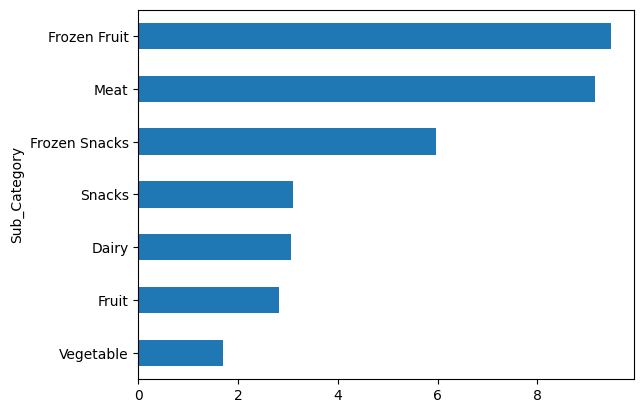

In [27]:
groceries.groupby("Sub_Category")["Price_Dollars"].mean().sort_values().plot.barh()

In [28]:
happiness = pd.read_csv('/content/happiness_survey_data.csv')
happiness.head()

,country_name,year,happiness_score,social_support,freedom_to_make_life_choices,healthy_life_expectancy_at_birth
0,Afghanistan,2008,3.723590,0.450662,0.718114,50.500000
1,Afghanistan,2009,4.401778,0.552308,0.678896,50.799999
2,Afghanistan,2010,4.758381,0.539075,0.600127,51.099998
3,Afghanistan,2011,3.831719,0.521104,0.495901,51.400002
4,Afghanistan,2012,3.782938,0.520637,0.530935,51.700001


<Axes: xlabel='year'>

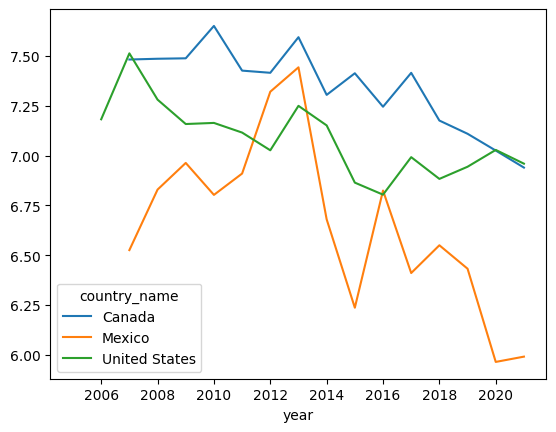

In [29]:
(happiness[happiness["country_name"]
          .isin(['Mexico', 'Canada', 'United States'])]
          .iloc[:,:3]
          .pivot(index ='year', columns = 'country_name', values = 'happiness_score')
          .plot.line()
)

**PAIR PLOTS** contains both histogram and scatter plots

*Histograms* : useful for looking at distributions of data (normal, uniform, poisson etc)

*Scatterplot* : useful to find corelations between numeric features

In [30]:
# PAIR PLOTS for numeric data
student = pd.read_csv('/content/student_data.csv')
student.head()

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
0,10.602667,4.586892,99,99.187294,5
1,8.172997,4.405120,72,67.070903,3
2,6.430132,0.519630,52,39.644696,4
3,7.963793,5.004348,80,61.843705,1
4,8.279421,2.984489,87,103.495002,0


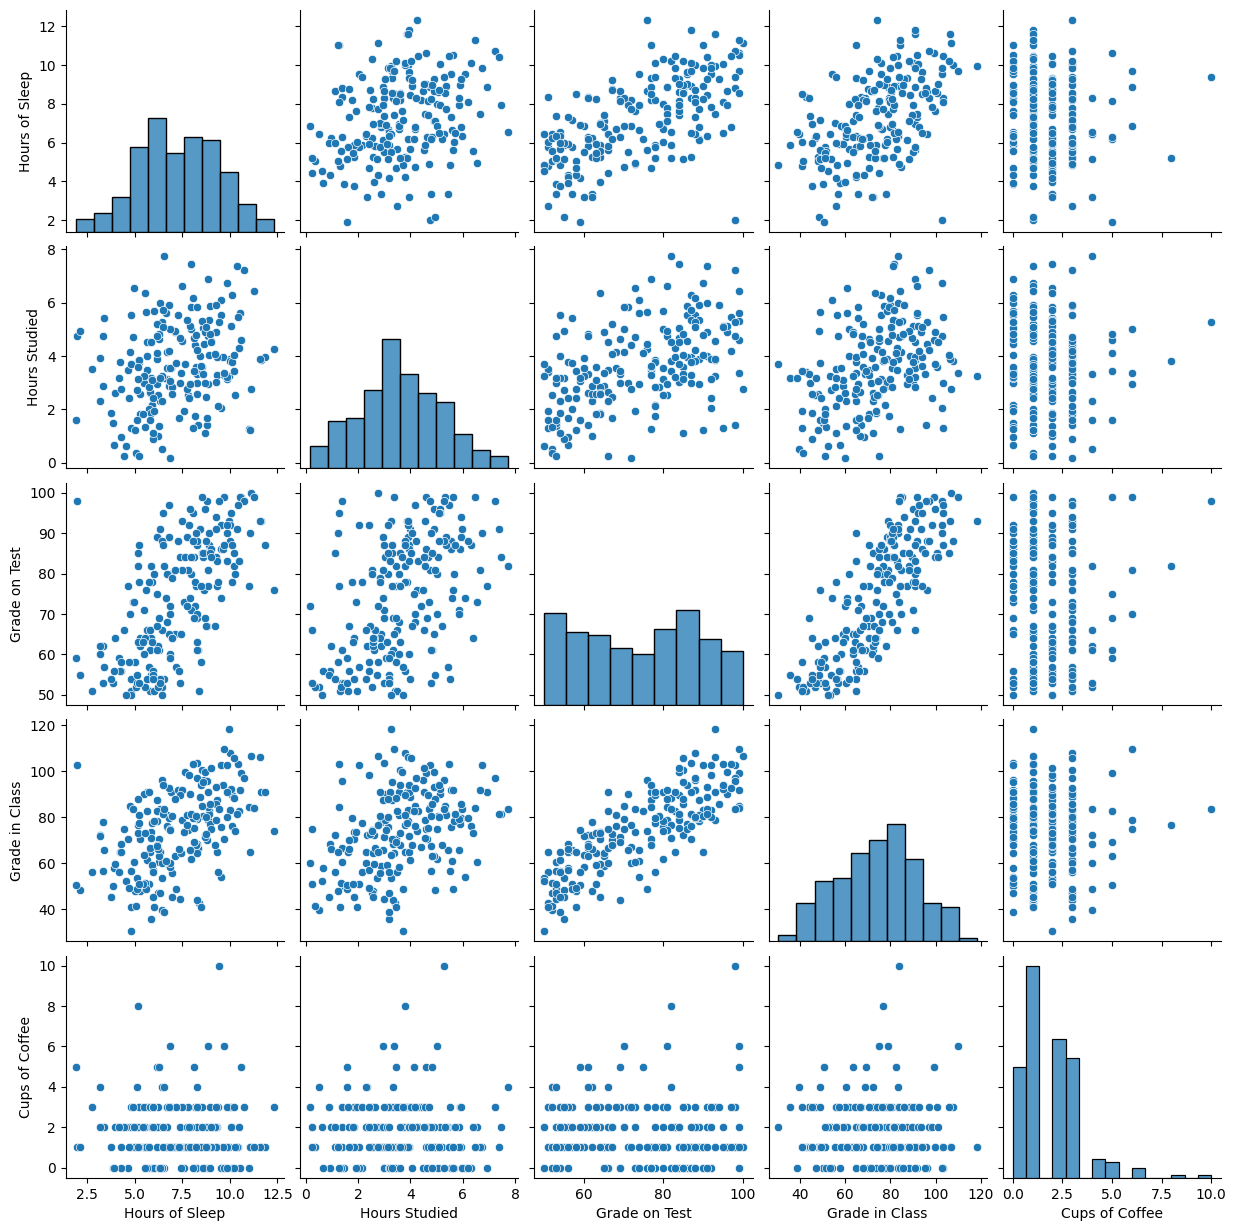

In [31]:
import seaborn as sns
sns.pairplot(student)
# We hav 5 columns of numeric data so 5 by 5 pair plots are shown. Text cols are automatically ignored in paid plots
# Diagnol plots are columns plotted against themselves so it basically shows the distribution of the data

In [32]:
# Circular distribution that is spread wide shows no corelation. Linear ones are strong corelation.
# Charts in last column are vertical points as they are discrete values (cups of coffee) where as other charts have continuous data points like 5 /5.5 hours of sleep

DISTRIBUTION of DATA

In [33]:
student["Cups of Coffee"].value_counts().sort_index()

0     35
1     67
2     44
3     38
4      6
5      5
6      3
8      1
10     1
Name: Cups of Coffee, dtype: int64

<Axes: xlabel='Cups of Coffee', ylabel='Count'>

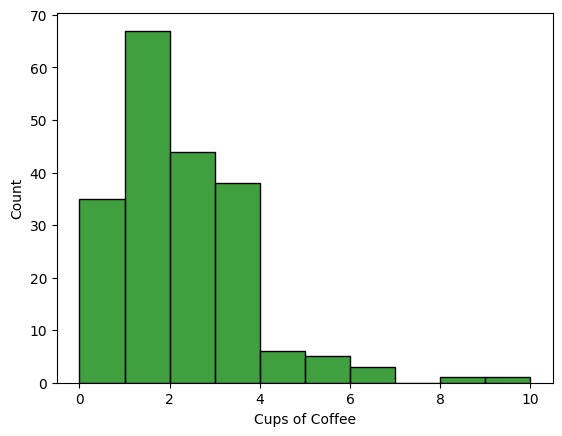

In [34]:
# Visualsing discrete data
import seaborn as sns
sns.histplot(student["Cups of Coffee"], bins =10, color = 'green')

In [35]:
# Checking continuous data
student["Hours Studied"].value_counts()

4.586892    1
4.127774    1
3.727017    1
2.998599    1
2.141476    1
           ..
5.974376    1
4.512047    1
4.463281    1
3.289461    1
1.127786    1
Name: Hours Studied, Length: 200, dtype: int64

In [36]:
# Converting data to discrete form
student["Hours Studied"].round().value_counts()

3.0    53
4.0    38
5.0    37
2.0    23
6.0    19
1.0    18
7.0     7
0.0     4
8.0     1
Name: Hours Studied, dtype: int64

<Axes: xlabel='Hours Studied', ylabel='Count'>

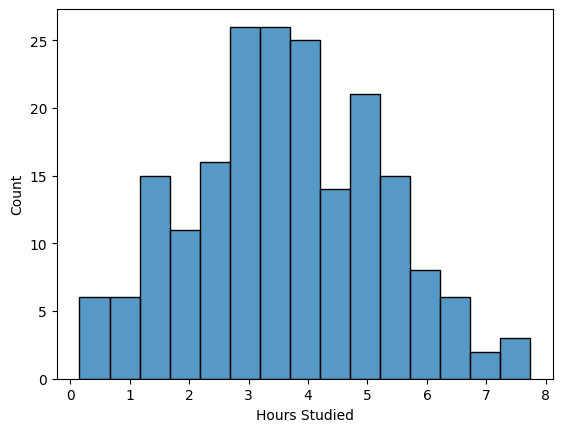

In [37]:
# Histogram automatically converts the continuous data to discrete
sns.histplot(student["Hours Studied"], bins = 15)

**SCATTER PLOT **
To check corelation between 2 numeric columns


<Axes: xlabel='Hours of Sleep', ylabel='Grade on Test'>

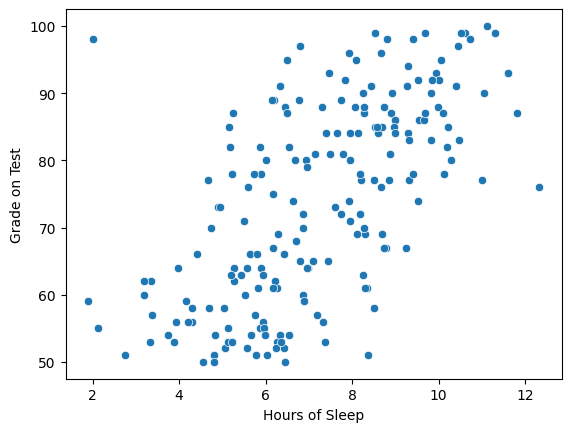

In [38]:
sns.scatterplot(data = student, x = 'Hours of Sleep', y = 'Grade on Test')
# We notice one outlier on top left

In [39]:
student[student["Hours of Sleep"]<=2]

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
12,2.000000,4.743829,98,102.670751,1
148,1.899843,1.584035,59,50.616890,5


**CORELATION**

Ranges from -1 to 1

**A correlation under 0.5 is weak, between 0.5 and 0.8 is moderate, and over 0.8 is strong**

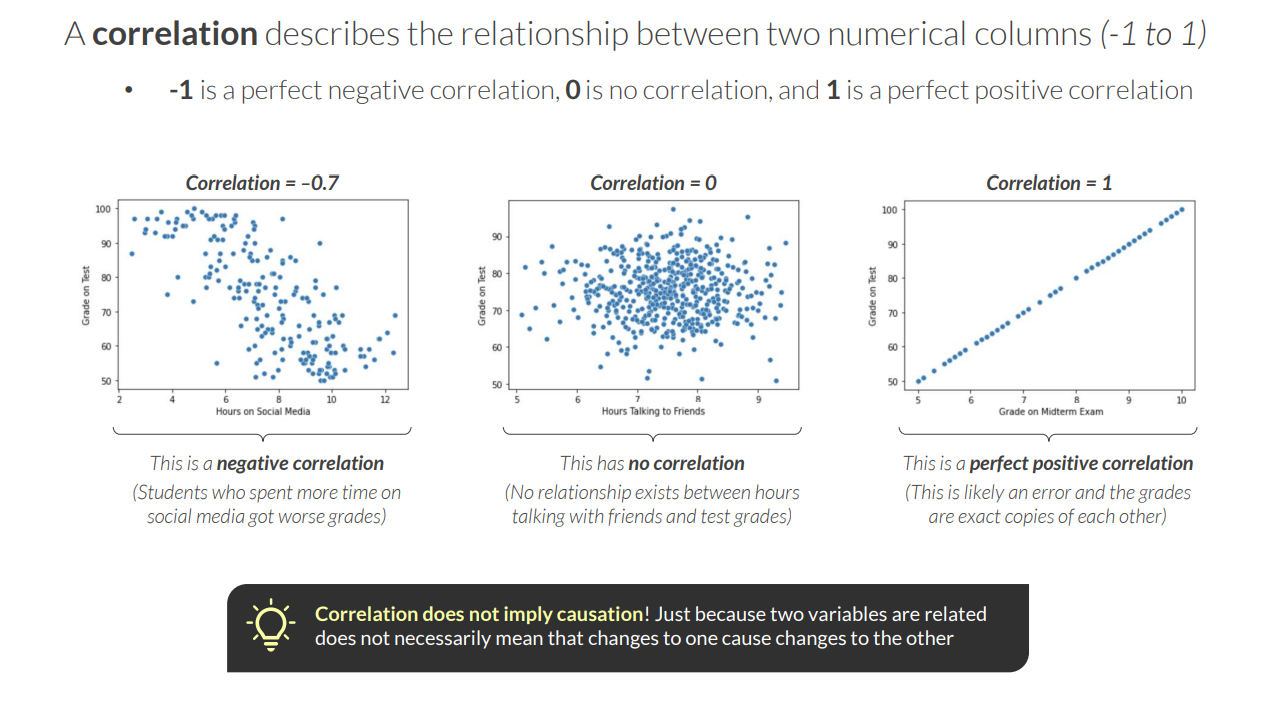

In [40]:
student.corr()
# Every numeric column is compared against all columns

,Hours of Sleep,Hours Studied,Grade on Test,Grade in Class,Cups of Coffee
Hours of Sleep,1.000000,0.265404,0.637864,0.502397,-0.079643
Hours Studied,0.265404,1.000000,0.479153,0.374456,-0.020209
Grade on Test,0.637864,0.479153,1.000000,0.815721,-0.038804
Grade in Class,0.502397,0.374456,0.815721,1.000000,-0.035288
Cups of Coffee,-0.079643,-0.020209,-0.038804,-0.035288,1.000000


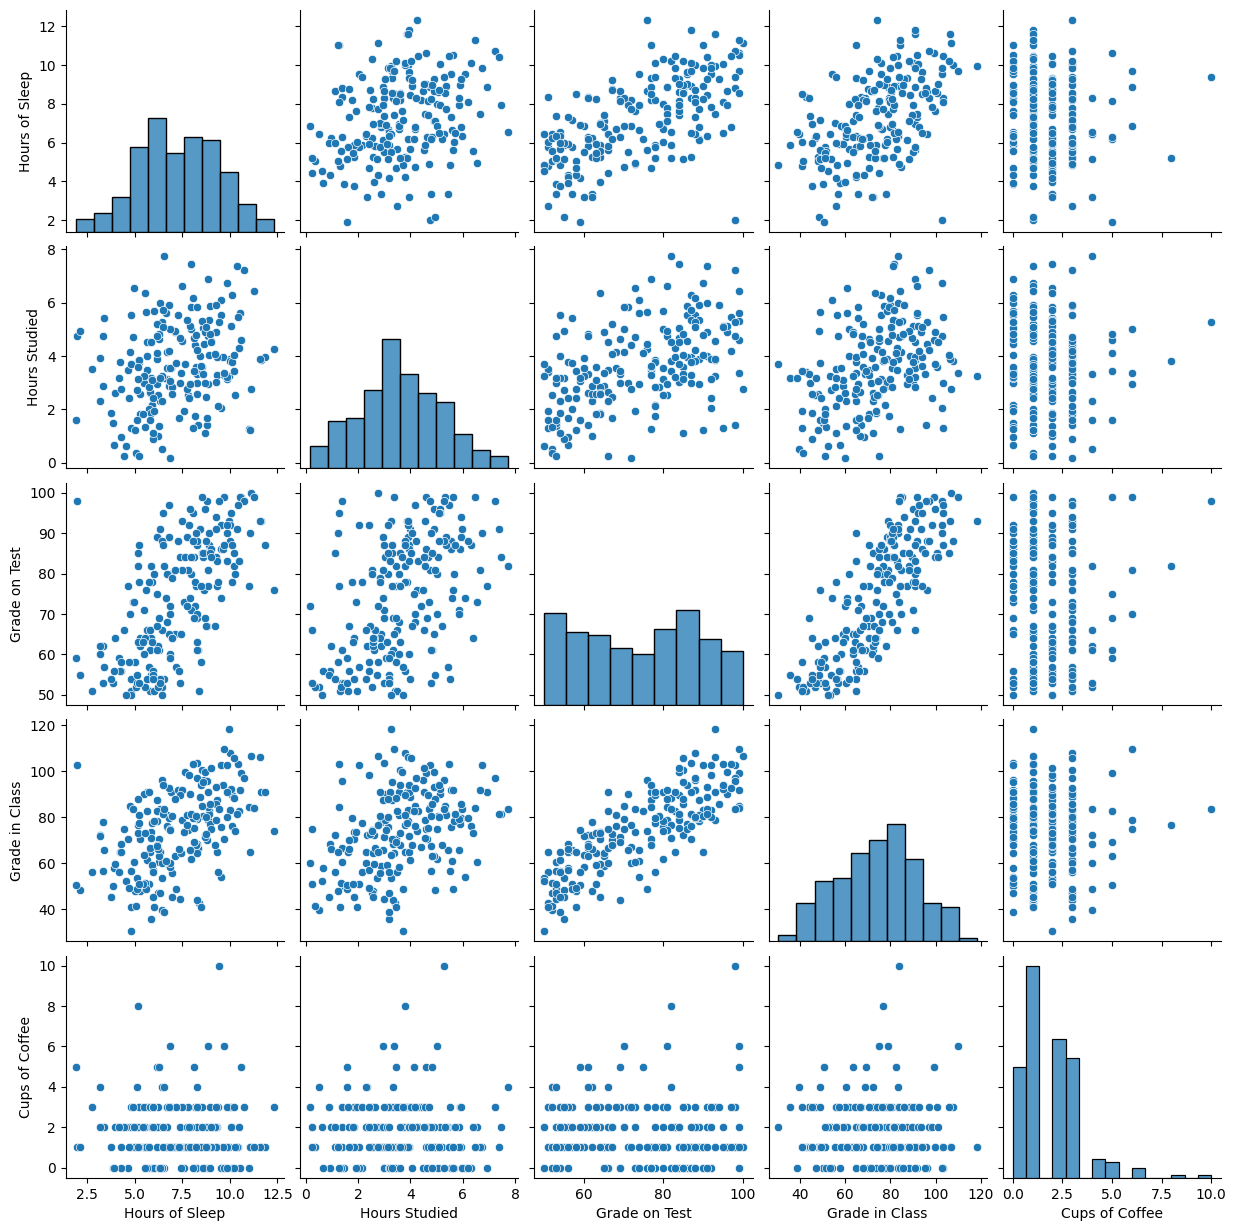

In [41]:
# There is strong link between corelation table and pair plots plotted below
sns.pairplot(student)